# 🧰 1. Opening and Saving an Image (Pillow)

In [ ]:
from PIL import Image

img = Image.open("data/carrots.jpg")      # Open image with given path in parameter

In [7]:
# img.show()
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=275x183 at 0x20E4FCF65F0>


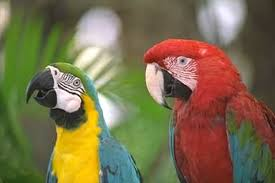

In [8]:
img

In [5]:
img.save("data/carrots_copy.png")  # Save in a different format

In [9]:
img.width, img.height  # Get dimensions

(275, 183)

In [ ]:
pixels = img.load()
# pixels[100, 100]  # Get pixel color at x=100, y=100
pixels[0, 0]  # Get pixel color at x=0, y=0

(121, 117, 92)

In [14]:
for x in range(min(img.width, 10)):  # Print first 10 columns
    for y in range(min(img.height, 10)): # Print first 10 rows
        pixel_value = pixels[x, y]
        print(f"Pixel at ({x}, {y}): {pixel_value}")

Pixel at (0, 0): (121, 117, 92)
Pixel at (0, 1): (132, 128, 103)
Pixel at (0, 2): (147, 143, 118)
Pixel at (0, 3): (161, 155, 131)
Pixel at (0, 4): (169, 161, 138)
Pixel at (0, 5): (176, 165, 143)
Pixel at (0, 6): (183, 171, 147)
Pixel at (0, 7): (187, 175, 151)
Pixel at (0, 8): (193, 178, 155)
Pixel at (0, 9): (199, 183, 160)
Pixel at (1, 0): (122, 118, 91)
Pixel at (1, 1): (133, 129, 102)
Pixel at (1, 2): (148, 144, 117)
Pixel at (1, 3): (160, 156, 131)
Pixel at (1, 4): (168, 162, 138)
Pixel at (1, 5): (174, 166, 143)
Pixel at (1, 6): (182, 172, 147)
Pixel at (1, 7): (187, 175, 151)
Pixel at (1, 8): (204, 189, 166)
Pixel at (1, 9): (209, 194, 171)
Pixel at (2, 0): (124, 120, 93)
Pixel at (2, 1): (134, 130, 103)
Pixel at (2, 2): (149, 145, 118)
Pixel at (2, 3): (160, 156, 129)
Pixel at (2, 4): (168, 162, 136)
Pixel at (2, 5): (174, 167, 141)
Pixel at (2, 6): (181, 171, 146)
Pixel at (2, 7): (185, 173, 149)
Pixel at (2, 8): (202, 187, 164)
Pixel at (2, 9): (207, 192, 169)
Pixel at (3, 

# 📏 2. Resizing an Image (Pillow)

In [ ]:
from PIL import Image

# img = Image.open("image.jpg")
resized = img.resize((256, 256))  # Resize to 256x256
resized.save("resized.jpg")

# 🌟 3. Adjust Brightness (Pillow)

In [18]:
from PIL import Image, ImageEnhance

# img = Image.open("image.jpg")
enhancer = ImageEnhance.Brightness(img)

brighter = enhancer.enhance(1.5)  # 1.0 = original, >1 = brighter
brighter.save("brighter.jpg")

# 🎨 4. Apply a Filter (e.g., Blur) (Pillow)

In [19]:
from PIL import Image, ImageFilter

# img = Image.open("image.jpg")
blurred = img.filter(ImageFilter.BLUR)
blurred.save("blurred.jpg")

In [ ]:
# Gaussian Blur
blurred = img.filter(ImageFilter.GaussianBlur(radius=5))
blurred.save("blurred2.jpg")

In [ ]:
# Box Blur
img.filter(ImageFilter.BoxBlur(3))

# Unsharp Mask (works like sharpen/blur hybrid)
img.filter(ImageFilter.UnsharpMask(radius=2, percent=150, threshold=3))

In [ ]:
smooth = img.filter(ImageFilter.SMOOTH)
smooth.save("smooth.jpg")

In [24]:
img_blur = Image.open("data/blurred.jpg")

sharpen = img_blur.filter(ImageFilter.SHARPEN)
sharpen.save("data/sharpen_blur.jpg")

In [27]:
img_edges = img.filter(ImageFilter.EMBOSS)
img_edges.save("data/edges.jpg")

# 🔄 5. Rotate or Crop Image (Pillow)

In [29]:
rotated = img.rotate(90)  # Rotate 90 degrees clockwise
rotated.save("data/rotated.jpg")

cropped = img.crop((100, 100, 300, 300))  # (left, top, right, bottom)
cropped.save("data/cropped.jpg")

# 🧮 6. Pixel Access and NumPy Conversion (Pillow + NumPy)

In [31]:
from PIL import Image
import numpy as np

array = np.array(img)  # Now you can use NumPy operations on pixels

print(array.shape)  # (height, width, channels)

(183, 275, 3)


In [32]:
array

array([[[121, 117,  92],
        [122, 118,  91],
        [124, 120,  93],
        ...,
        [ 49,  43,  29],
        [ 49,  43,  27],
        [ 49,  43,  27]],

       [[132, 128, 103],
        [133, 129, 102],
        [134, 130, 103],
        ...,
        [ 50,  44,  30],
        [ 49,  43,  27],
        [ 49,  43,  27]],

       [[147, 143, 118],
        [148, 144, 117],
        [149, 145, 118],
        ...,
        [ 50,  44,  30],
        [ 50,  44,  28],
        [ 50,  44,  28]],

       ...,

       [[ 71,  93,  47],
        [ 63,  85,  39],
        [ 51,  73,  27],
        ...,
        [ 56,  63,  29],
        [ 56,  63,  29],
        [ 57,  64,  30]],

       [[ 68,  90,  44],
        [ 64,  86,  40],
        [ 53,  75,  29],
        ...,
        [ 57,  64,  30],
        [ 57,  64,  30],
        [ 57,  64,  30]],

       [[ 63,  85,  39],
        [ 64,  86,  40],
        [ 55,  77,  31],
        ...,
        [ 57,  64,  30],
        [ 58,  65,  31],
        [ 58,  65,  31]]

In [33]:
np.mean(array, axis=(0, 1))  # Average color of the image

array([122.1460308 , 110.05309488,  76.36182812])

In [35]:
img_np = np.zeros((100, 100, 3), dtype=np.uint8)  # Create a black image array

In [36]:
# tranform to pillow from numpy
img = Image.fromarray(img_np)
img.save("black_image.png")

In [37]:
img = Image.open("data/carrots.jpg").convert("L")  # convert to grayscale
img.show()